In [1]:
import matplotlib
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import healpy as hp
%matplotlib inline



In [2]:
def NLL(theta_i, phi_i,theta, phi):
    return -np.cos(theta_i-theta)-np.cos(phi_i-phi)

In [3]:
npoints = 500

theta = np.linspace(0, np.pi, npoints)
phi = np.linspace(0,2*np.pi,2*npoints)

X, Y = np.meshgrid(phi, theta)


In [10]:
theta_i = 0
phi_i = np.pi/2



Z = NLL(theta_i=theta_i, phi_i=phi_i,theta=Y, phi=X)

Text(0.5, 0, 'NLL')

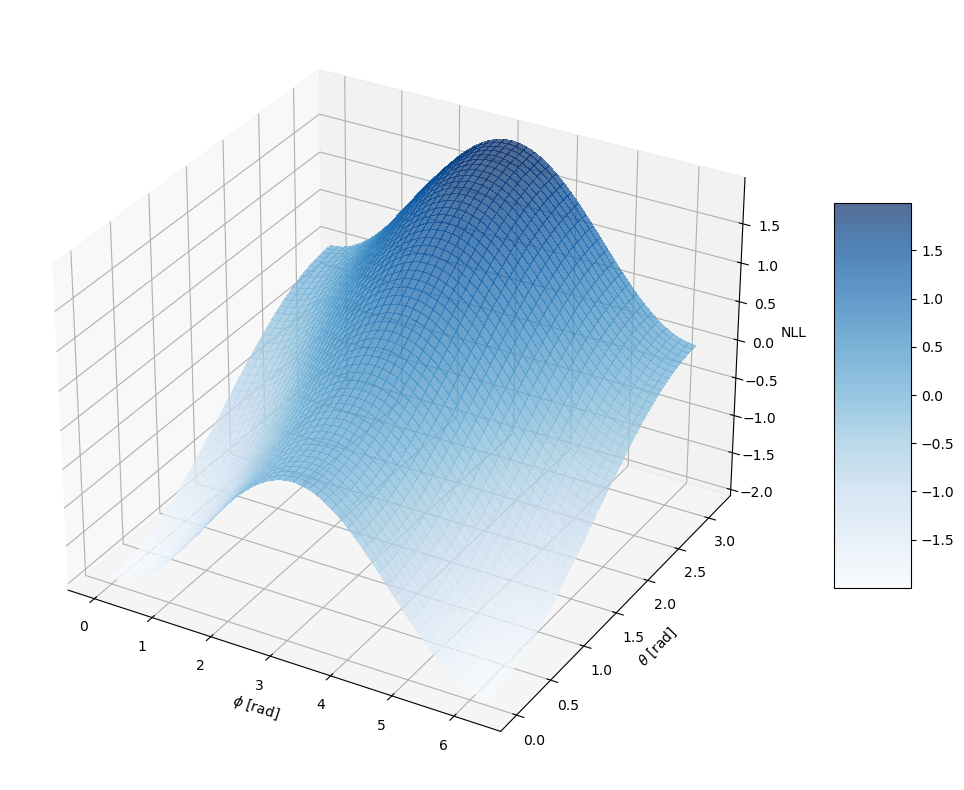

In [15]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111,projection='3d')
#ax.scatter(phi_i, theta_i, NLL(theta_i=theta_i, phi_i=phi_i,theta=theta_i, phi=phi_i),color='r',s = 200)
surface = ax.plot_surface(X, Y, Z1,  cmap='Blues', edgecolor='none', antialiased=False, alpha=.7)
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.xlabel("$\phi$ [rad]")
plt.ylabel("$\\theta$ [rad]")
ax.set_zlabel("NLL")

In [16]:
def NLL2(v_i,v):
    return -np.dot(v_i,v)

In [39]:
v_i = np.array([0,0,1])

NSIDE = 16
NPIX = hp.nside2npix(NSIDE)
print(NPIX)



3072


In [40]:
vals = []

for i in np.arange(NPIX):
    vals += [ NLL2( hp.pix2vec(NSIDE,i) , v_i ) ]

vals = np.array(vals)

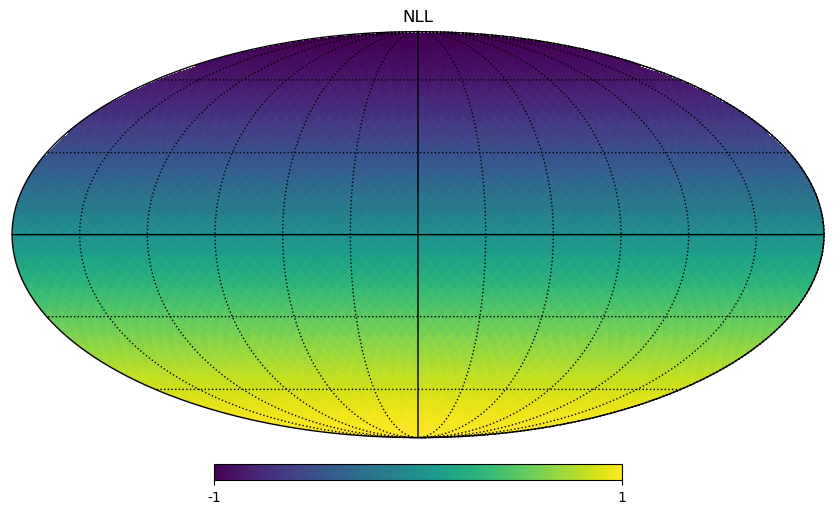

In [41]:
hp.mollview(vals, title="NLL",min=-1.0,max=1.0)
hp.graticule()

